In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Installing Faker for creating synthetic Data Values
!pip install faker
!pip install scikit-surprise


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357281 sha256=18f63c651d8b320b4d52fa5ba3ff90248ff7d3989ec8bfe282b1e0bb666ec535
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [3]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from faker import Faker
import random
import uuid
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
from scipy.stats import zscore
from faker.providers import BaseProvider
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import precision_score, recall_score


In [14]:
# Initialize Faker
fake = Faker()

# Function to generate customer data
def generate_customer_data(num_customers):
    def calculate_emi(principal, rate, term):
        monthly_rate = rate / (12 * 100)
        emi = (principal * monthly_rate * (1 + monthly_rate) ** term) / \
              ((1 + monthly_rate) ** term - 1)
        return round(emi, 2)

#Creating meaningful data set for finding defaulters
    data = []
    for customer_id in range(1, num_customers + 1):
      credit_score = random.randint(300, 850)
      repayment_status = "Default" if (credit_score < 500 or random.random() < 0.05) else "No Default" #Based on credit_score status has been set for Default and No Default
      age = random.randint(21, 65)
      #Annual Income has been generated based on age on average
      if 21 <= age < 25:
        annual_income = random.randint(100000, 200000)
      elif 25 <= age < 35:
        annual_income = random.randint(200001, 350000)
      elif 35 <= age < 45:
        annual_income = random.randint(350001, 600000)
      elif 45 <= age < 55:
        annual_income = random.randint(600001, 1000000)
      else:  # age >= 55
        annual_income = random.randint(1000001, 1500000)
      #Loan Amount generation based on Credit Score
      loan_amount= random.randint(100000, 500000)
      if 300 <= credit_score < 550:
        loan_amount = random.randint(100000, 200000)
      elif 550 <= credit_score < 700:
        loan_amount = random.randint(200001, 350000)
      else:  # 700 <= credit_score < 850
        loan_amount = random.randint(350001, 500000)
     #Interest generation based on Credit Score
      if 300 <= credit_score < 550:
            interest_rate = round(random.uniform(13.0, 15.0), 2)
      elif 550 <= credit_score < 700:
            interest_rate = round(random.uniform(9.0, 12.0), 2)
      else:  # 700 <= credit_score < 850
            interest_rate = round(random.uniform(3.0, 8.0), 2)
      loan_term= random.choice([12, 24, 36, 48, 60])
      dti_ratio = round(loan_amount / annual_income, 2)

      data.append({
            "customer_id": customer_id,
            "name": fake.name(),
            "age": age,
            "annual_income": annual_income,
            "credit_score": credit_score,
            "loan_amount": loan_amount,
            "interest_rate": interest_rate,
            "loan_term": loan_term,
            "repayment_status": repayment_status,
        })
    return pd.DataFrame(data)

# Function to generate transaction data
def generate_transaction_data(customer_data, num_transactions):
    transaction_types = ["Deposit", "Withdrawal", "Transfer", "Payment", "Loan Repayment"]
    data = []
    customer_ids = customer_data['customer_id'].tolist()

    for _ in range(num_transactions):
        customer_id = random.choice(customer_ids)  # Select a random customer_id from customer_data
        data.append({
            "transaction_id": str(uuid.uuid4()),
            "customer_id": customer_id,
            "transaction_type": random.choice(transaction_types),
            "transaction_amount": round(random.uniform(100, 50000), 2),
            "transaction_date": fake.date_time_this_year(),
        })
    return pd.DataFrame(data)


# Generate datasets
num_customers = 1000
num_transactions = 5000

customer_data = generate_customer_data(num_customers)
transaction_data = generate_transaction_data(customer_data, num_transactions)

# Save datasets to CSV files
customer_data.to_csv("customer_data.csv", index=False)
transaction_data.to_csv("transaction_data.csv", index=False)

# Display a few records from each dataset
customer_data.head(), transaction_data.head()


(   customer_id              name  age  annual_income  credit_score  \
 0            1  Kenneth Martinez   57        1298979           343   
 1            2      Andrew Mason   40         545328           680   
 2            3       Sean Carter   49         854635           354   
 3            4      Lynn Bass MD   62        1146697           521   
 4            5     Bryan Bonilla   48         674102           367   
 
    loan_amount  interest_rate  loan_term repayment_status  
 0       151280          13.08         12          Default  
 1       261973          10.24         24       No Default  
 2       150800          13.73         36          Default  
 3       167502          14.21         36       No Default  
 4       154556          14.37         24          Default  ,
                          transaction_id  customer_id transaction_type  \
 0  c5dd3287-384b-4857-838e-143e6ccc82d9          537          Payment   
 1  96ed27c5-0c68-4c1a-a2cf-2df5a1ac7369          767    

In [5]:
customer_data.describe()
customer_data.isnull().sum()

,0
customer_id,0
name,0
age,0
annual_income,0
credit_score,0
loan_amount,0
interest_rate,0
loan_term,0
repayment_status,0


In [6]:
#No of rows and columns
customer_data.shape

(100, 9)

In [7]:
#Feature and target names
customer_data.columns.values

array(['customer_id', 'name', 'age', 'annual_income', 'credit_score',
       'loan_amount', 'interest_rate', 'loan_term', 'repayment_status'],
      dtype=object)

In [15]:
#Drop unnecessary columns and change repayment_status name
custData=customer_data.drop(['name'],axis=1)
custData.rename(columns={'repayment_status':'default'},inplace=True)
custData.head(100)


,customer_id,age,annual_income,credit_score,loan_amount,interest_rate,loan_term,default
0,1,57,1298979,343,151280,13.08,12,Default
1,2,40,545328,680,261973,10.24,24,No Default
2,3,49,854635,354,150800,13.73,36,Default
3,4,62,1146697,521,167502,14.21,36,No Default
4,5,48,674102,367,154556,14.37,24,Default
...,...,...,...,...,...,...,...,...
95,96,47,895015,764,494812,3.44,60,No Default
96,97,51,642653,466,193388,13.14,24,Default
97,98,31,225430,749,396594,6.35,24,No Default
98,99,24,149149,342,118103,13.33,48,Default


In [16]:
#Converting boolean categorical features
#Lable Encoding
label_encodable = ['default']
label_encoders = {col: LabelEncoder() for col in label_encodable}
for col in label_encodable:
    custData[col] = label_encoders[col].fit_transform(custData[col])

custData.head(10)


,customer_id,age,annual_income,credit_score,loan_amount,interest_rate,loan_term,default
0,1,57,1298979,343,151280,13.08,12,0
1,2,40,545328,680,261973,10.24,24,1
2,3,49,854635,354,150800,13.73,36,0
3,4,62,1146697,521,167502,14.21,36,1
4,5,48,674102,367,154556,14.37,24,0
5,6,30,273744,685,322832,10.18,24,1
6,7,52,693308,749,491463,4.74,48,1
7,8,31,270187,651,278079,10.29,60,0
8,9,51,802077,493,163263,13.67,36,0
9,10,61,1349191,489,140168,14.55,36,0


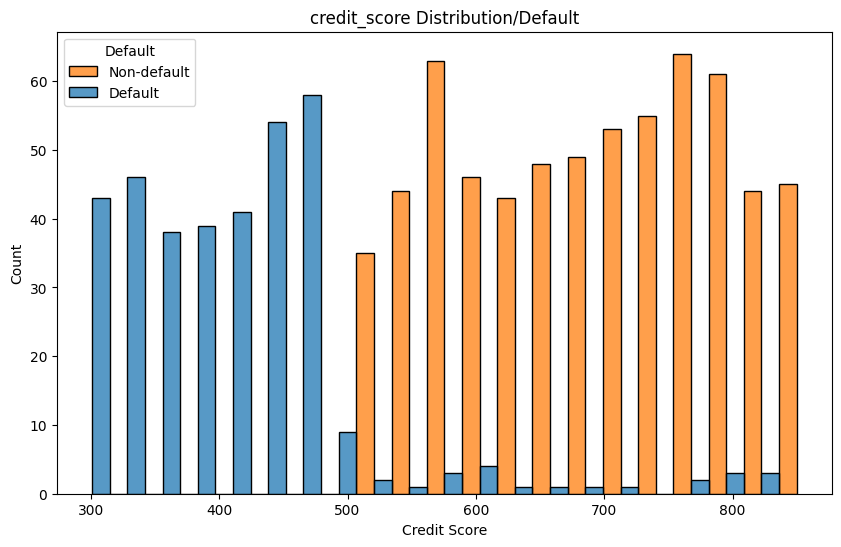

In [17]:
#Vizualization
#CreditScore VS Default
plt.figure(figsize=(10, 6))
sns.histplot(data=custData, x='credit_score',hue='default',multiple="dodge", bins=20)
plt.title('credit_score Distribution/Default')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Non-default', 'Default'])
plt.show()

In [18]:
#Standard Scalar(Integers to smaller values)
scale_column=['age', 'annual_income', 'loan_amount', 'credit_score','interest_rate', 'loan_term']
custData[scale_column]=StandardScaler().fit_transform(custData[scale_column])
custData.head(10)

,customer_id,age,annual_income,credit_score,loan_amount,interest_rate,loan_term,default
0,1,1.081423,1.566033,-1.574400,-0.977213,0.711240,-1.437795,0
1,2,-0.206617,-0.277778,0.588379,-0.061329,-0.064078,-0.718538,1
2,3,0.475287,0.478943,-1.503805,-0.981184,0.888690,0.000719,0
3,4,1.460258,1.193474,-0.432042,-0.842991,1.019729,0.000719,1
4,5,0.399520,0.037268,-1.420375,-0.950107,1.063409,-0.718538,0
5,6,-0.964287,-0.942210,0.620467,0.442225,-0.080458,-0.718538,1
6,7,0.702588,0.084256,1.031203,1.837493,-1.565576,0.719976,1
7,8,-0.888520,-0.950912,0.402264,0.071934,-0.050428,1.439234,0
8,9,0.626821,0.350359,-0.611739,-0.878064,0.872310,0.000719,0
9,10,1.384491,1.688876,-0.637410,-1.069155,1.112549,0.000719,0


In [19]:
custData=custData.drop(columns=['customer_id'])

In [20]:
#Logistic Regression

X = custData.drop('default', axis=1)
y = custData['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic_Accuracy: {accuracy * 100:.2f}%")

# Model evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Display a classification report for more metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Logistic_Accuracy: 96.50%
Confusion Matrix:
[[ 66   4]
 [  3 127]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        70
           1       0.97      0.98      0.97       130

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



ROC-AUC: 0.98


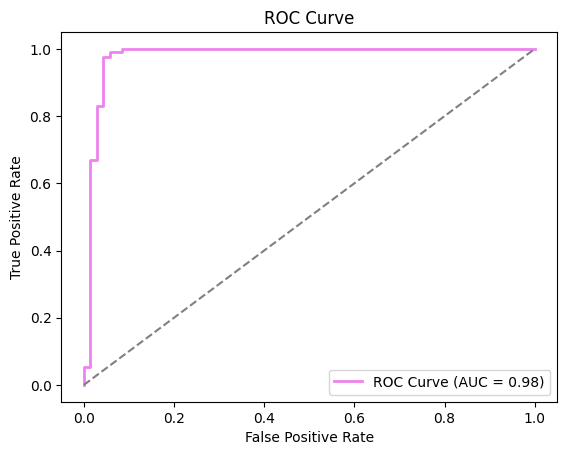

In [21]:
# Get predicted probabilities for the positive class (Default = 1)
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC: {roc_auc:.2f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC Curve
#plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='violet', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [22]:
transaction_data.head(10)

,transaction_id,customer_id,transaction_type,transaction_amount,transaction_date
0,c5dd3287-384b-4857-838e-143e6ccc82d9,537,Payment,31113.30,2024-07-29 05:57:08.456954
1,96ed27c5-0c68-4c1a-a2cf-2df5a1ac7369,767,Withdrawal,37734.04,2024-03-03 08:06:57.181345
2,47211064-5b7f-45d5-bed5-c9a4149dc4a4,80,Loan Repayment,17642.16,2024-04-09 14:12:41.010177
3,8e7c8174-af60-4c43-a447-179a87f98267,908,Withdrawal,35307.50,2024-03-20 20:31:20.659335
4,b4c295d0-bfb9-46f7-8fc0-5d265c918145,614,Payment,30532.38,2024-01-08 16:40:21.212255
5,b9bc456f-d497-4cda-bcf5-00a47238c82c,647,Withdrawal,26802.35,2024-09-20 03:21:03.668760
6,5a61622b-5686-46dd-a67e-ad838ec27bfa,60,Payment,2107.13,2024-07-11 01:52:41.213320
7,3b242810-8e43-4677-816c-3c612cc043c9,404,Transfer,47570.50,2024-10-12 09:27:20.750731
8,79971525-3dbe-44d4-8c10-629f48ae7d40,632,Payment,40112.69,2024-02-29 05:24:59.640580
9,58100ac5-8350-4249-9baf-a9f9043d14ce,751,Deposit,28252.30,2024-02-29 14:41:46.462196


In [23]:
transaction_data.describe()

,customer_id,transaction_amount,transaction_date
count,5000.000000,5000.000000,5000
mean,501.191600,25363.934464,2024-06-25 04:36:29.654849280
min,1.000000,105.880000,2024-01-01 00:31:59.686162
25%,251.000000,12945.007500,2024-03-26 00:55:44.465834496
50%,501.000000,25514.460000,2024-06-25 03:18:45.116481536
75%,752.250000,37769.355000,2024-09-24 01:23:51.737070336
max,1000.000000,49982.570000,2024-12-22 11:58:18.947014
std,289.276868,14338.130401,NaN


In [24]:
transaction_data.isnull().sum()

,0
transaction_id,0
customer_id,0
transaction_type,0
transaction_amount,0
transaction_date,0


In [25]:
transaction_data.nunique()

,0
transaction_id,5000
customer_id,996
transaction_type,5
transaction_amount,5000
transaction_date,5000


In [26]:
transaction_data['transaction_type'].unique()

array(['Payment', 'Withdrawal', 'Loan Repayment', 'Transfer', 'Deposit'],
      dtype=object)

In [27]:
transaction_data['transaction_date'].min(), transaction_data['transaction_date'].max()

(Timestamp('2024-01-01 00:31:59.686162'),
 Timestamp('2024-12-22 11:58:18.947014'))

In [28]:
# Grouping data by customer_id
data = transaction_data.groupby('customer_id').agg({
    'transaction_amount': ['sum', 'mean', 'count']  # Total spend, average transaction, transaction count
})
data.columns = ['total_amount', 'average_amount', 'transaction_count']
data.reset_index(inplace=True)

# Merging grouped data back into transaction_data
transaction_data = transaction_data.merge(data, on='customer_id', how='left')

# Standardizing the aggregated metrics (optional)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transaction_data[['total_amount', 'average_amount', 'transaction_count']]
)

# Check the result
print(transaction_data.head())

                         transaction_id  customer_id transaction_type  \
0  c5dd3287-384b-4857-838e-143e6ccc82d9          537          Payment   
1  96ed27c5-0c68-4c1a-a2cf-2df5a1ac7369          767       Withdrawal   
2  47211064-5b7f-45d5-bed5-c9a4149dc4a4           80   Loan Repayment   
3  8e7c8174-af60-4c43-a447-179a87f98267          908       Withdrawal   
4  b4c295d0-bfb9-46f7-8fc0-5d265c918145          614          Payment   

   transaction_amount           transaction_date  total_amount  \
0            31113.30 2024-07-29 05:57:08.456954     160292.57   
1            37734.04 2024-03-03 08:06:57.181345     279504.94   
2            17642.16 2024-04-09 14:12:41.010177     114004.18   
3            35307.50 2024-03-20 20:31:20.659335     168097.43   
4            30532.38 2024-01-08 16:40:21.212255      81470.67   

   average_amount  transaction_count  
0    22898.938571                  7  
1    31056.104444                  9  
2    28501.045000                  4  
3    336

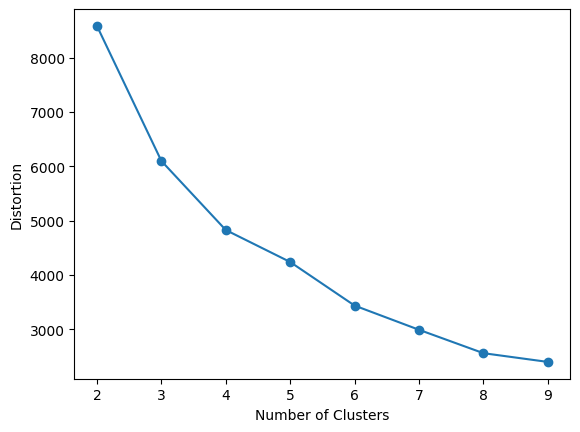

In [29]:
# Elbow Method
distortions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

# Plot the Elbow Curve
import matplotlib.pyplot as plt
plt.plot(range(2, 10), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

# Final Model
kmeans = KMeans(n_clusters=3, random_state=42)
transaction_data['cluster'] = kmeans.fit_predict(scaled_data)

In [30]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(scaled_data, transaction_data['cluster'])
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.9703808584961119


In [31]:
# Silhouette Score
silhouette = silhouette_score(scaled_data, transaction_data['cluster'])
print(f'Silhouette Score: {silhouette}')

Silhouette Score: 0.3515975475667749


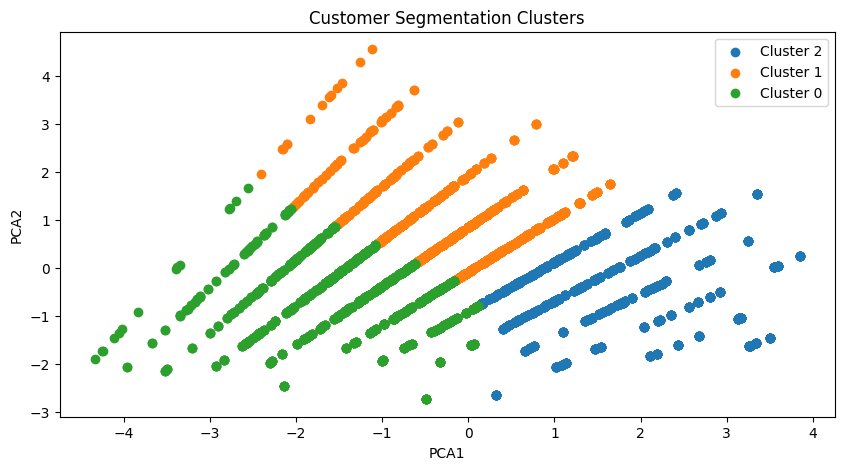

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
transaction_data['pca1'] = pca_data[:, 0]
transaction_data['pca2'] = pca_data[:, 1]

# Plot clusters
plt.figure(figsize=(10, 5))
for cluster in transaction_data['cluster'].unique():
    cluster_data = transaction_data[transaction_data['cluster'] == cluster]
    plt.scatter(cluster_data['pca1'], cluster_data['pca2'], label=f'Cluster {cluster}')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('Customer Segmentation Clusters')
plt.show()


In [33]:
transaction_data.groupby('cluster').mean(numeric_only=True)

,customer_id,transaction_amount,total_amount,average_amount,transaction_count,pca1,pca2
cluster,,,,,,,
0,507.672781,19458.295870,92389.774663,19458.295870,4.773964,-1.306871,-0.558313
1,504.714692,29970.825638,142516.913861,29970.825638,4.820046,-0.117847,0.904570
2,490.162162,26580.683707,219609.764395,26580.683707,8.329472,1.554408,-0.414978


In [34]:
# Extract relevant features for clustering
features = transaction_data[["average_amount", "transaction_count"]]

In [35]:
from sklearn.cluster import KMeans

# Apply K-Means Clustering (choose n_clusters based on business requirements)
kmeans = KMeans(n_clusters=3, random_state=42)
transaction_data['new_cluster'] = kmeans.fit_predict(features)

# Check the updated data
print(transaction_data[['average_amount', 'transaction_count', 'new_cluster']].head(10))


   average_amount  transaction_count  new_cluster
0    22898.938571                  7            2
1    31056.104444                  9            1
2    28501.045000                  4            2
3    33619.486000                  5            1
4    27156.890000                  3            2
5    21491.156000                  5            0
6    12381.430000                  4            0
7    19365.220000                  4            0
8    22745.512500                  8            2
9    22690.109091                 11            2


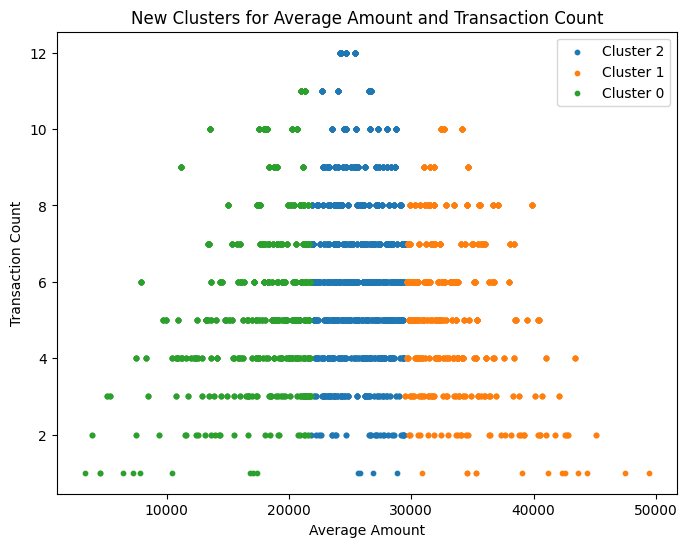

In [36]:
import matplotlib.pyplot as plt

# Plot new clusters
plt.figure(figsize=(8, 6))
for cluster in transaction_data['new_cluster'].unique():
    cluster_data = transaction_data[transaction_data['new_cluster'] == cluster]
    plt.scatter(
        cluster_data["average_amount"],
        cluster_data["transaction_count"],
        label=f"Cluster {cluster}",
        s=10
    )

plt.xlabel("Average Amount")
plt.ylabel("Transaction Count")
plt.title("New Clusters for Average Amount and Transaction Count")
plt.legend()
plt.show()
